# Inference: Hamiltonian MCMC

This example shows you how to perform Bayesian inference on a DISTRIBUTION, using [Hamiltonian Monte Carlo](http://pints.readthedocs.io/en/latest/mcmc_samplers/hamiltonian_mcmc.html).


In [1]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
log_pdf = pints.toy.NormalLogPDF([5, 5], [[4, -1], [1, 3]])

# Contour plot of pdf
levels = np.linspace(-3,12,20)
num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
# Choose starting points for 3 mcmc chains
xs = [
    [0, 0],
    [3, 3],
    [8, 8],
]

# Set a standard deviation, to give the method a sense of scale
sigma = [1, 1]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_pdf, 3, xs, sigma, method=pints.HamiltonianMCMC)

# Add stopping criterion
mcmc.set_max_iterations(1000)
mcmc.set_log_rate(100)

# Disable logging mode
mcmc.set_log_to_screen(True)

# Update step sizes used by individual samplers
for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(0.005)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

Running...
Using Hamiltonian MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. iMCMC iFrog Accept.   iMCMC iFrog Accept.   iMCMC iFrog Accept.   Time m:s
0     3      1     0     0         1     0     0         1     0     0          0:00.0
1     63     2     0     0.333     2     0     0.333     2     0     0.333      0:00.0
2     123    3     0     0.5       3     0     0.5       3     0     0.5        0:00.0
3     183    4     0     0.6       4     0     0.4       4     0     0.6        0:00.0
100   6003   101   0     0.931     101   0     0.775     101   0     0.745098   0:00.7
200   12003  201   0     0.965     201   0     0.842     201   0     0.866      0:01.3
300   18003  301   0     0.977     301   0     0.894     301   0     0.894      0:02.0
400   24003  401   0     0.983     401   0     0.920398  401   0     0.886      0:02.6
500   30003  501   0     0.986     501   0     0.936255  501   0     0.908      0:03.2
600   36003  601   0     0.988     601   0     

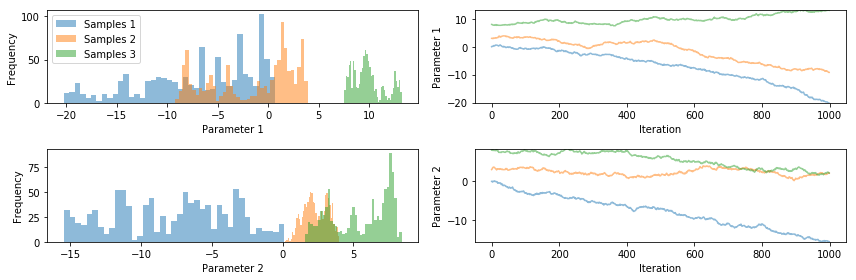

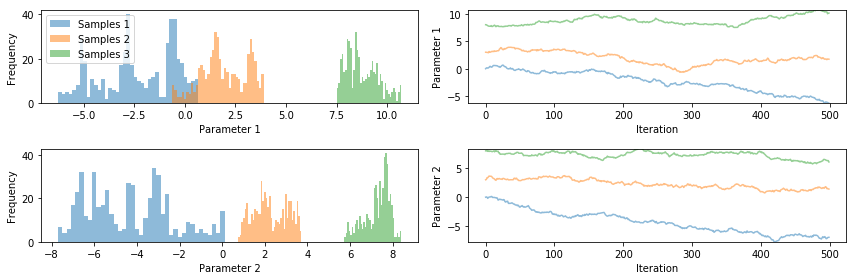

In [3]:
import pints.plot

# Show traces and histograms
pints.plot.trace(chains)

# Show traces and histograms at start only
pints.plot.trace(chains[:, :500])


# Discard warm up
chains = chains[:, 500:, :]

R-hat:
[4.003250803205601, 5.316994580072599]


/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


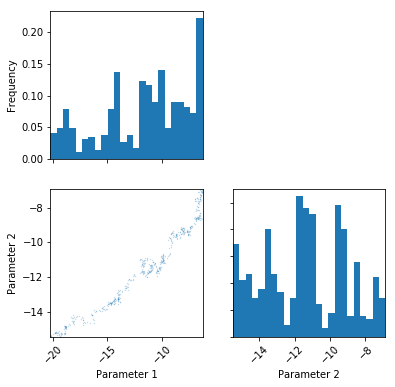

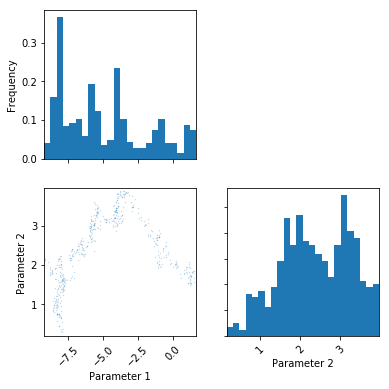

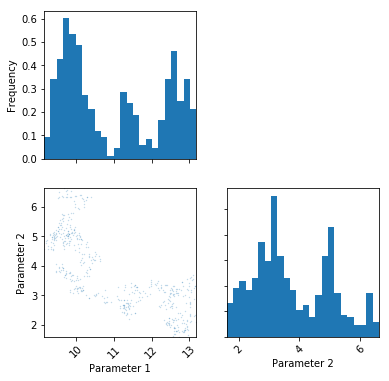

In [4]:
# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chains
pints.plot.pairwise(chains[0], kde=False)
pints.plot.pairwise(chains[1], kde=False)
pints.plot.pairwise(chains[2], kde=False)

# Show graphs
plt.show()